<center><h2>Case Study-2</h2></center>

### Questions

In this section, you need to try to find out answer to the given questions using the solutions you have done in Case Study (part 1) or you might need to write code to find the answers.

Find out answer for each question, put your answer along with the proper explanation and plots in pdf file. Upload a zip file containing your code and pdf.

Your code will be evaluated manually and score will be awarded accordingly.

### Importing libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('startup_funding.csv',encoding="utf-8")

In [3]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
data=pd.read_csv('startup_funding.csv')
df=data.copy()
df['CityLocation'].dropna(inplace=True)
df['CityLocation']=df['CityLocation'].str.split('/',expand=True)[0].str.strip()
city=np.array(df.CityLocation)
city[city=='Delhi']='New Delhi'
city[city=='bangalore']='Bangalore'
df['AmountInUSD'].fillna('0',inplace=True)
amount=np.array(df.AmountInUSD)
for i in range(len(amount)):
    amount[i]=''.join(amount[i].split(','))
amount=np.array(amount,dtype=int)
dic =dict()
for i in city:
    if i in dic:
        dic[i]+=1
    else:
        dic[i]=1
x=[]
y=[]
for i in dic:
    if (i=='Bangalore' or i=='Mumbai' or i=='Gurgaon' or i=='Noida' or i=='New Delhi'):
        x.append(i)
        y.append(dic[i])
x=np.array(x)
y=np.array(y)

x=x[np.argsort(y)]
y=np.sort(y)

x=x[::-1]
y=y[::-1]

### Exploring the dataset

In [5]:
df.head()

,SNo,Date,StartupName,IndustryVertical,SubVertical,CityLocation,InvestorsName,InvestmentType,AmountInUSD,Remarks
0,0,01/08/2017,TouchKin,Technology,Predictive Care Platform,Bangalore,Kae Capital,Private Equity,"1,300,000",NaN
1,1,02/08/2017,Ethinos,Technology,Digital Marketing Agency,Mumbai,Triton Investment Advisors,Private Equity,NaN,NaN
2,2,02/08/2017,Leverage Edu,Consumer Internet,Online platform for Higher Education Services,New Delhi,"Kashyap Deorah, Anand Sankeshwar, Deepak Jain,...",Seed Funding,NaN,NaN
3,3,02/08/2017,Zepo,Consumer Internet,DIY Ecommerce platform,Mumbai,"Kunal Shah, LetsVenture, Anupam Mittal, Hetal ...",Seed Funding,"500,000",NaN
4,4,02/08/2017,Click2Clinic,Consumer Internet,healthcare service aggregator,Hyderabad,"Narottam Thudi, Shireesh Palle",Seed Funding,"850,000",NaN


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2372 entries, 0 to 2371
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   SNo               2372 non-null   int64 
 1   Date              2372 non-null   object
 2   StartupName       2372 non-null   object
 3   IndustryVertical  2201 non-null   object
 4   SubVertical       1436 non-null   object
 5   CityLocation      2193 non-null   object
 6   InvestorsName     2364 non-null   object
 7   InvestmentType    2371 non-null   object
 8   AmountInUSD       1525 non-null   object
 9   Remarks           419 non-null    object
dtypes: int64(1), object(9)
memory usage: 102.0+ KB


In [8]:
#Checking for null values
df.isnull().sum()

SNo                    0
Date                   0
StartupName            0
IndustryVertical     171
SubVertical          936
CityLocation         179
InvestorsName          8
InvestmentType         1
AmountInUSD          847
Remarks             1953
dtype: int64

### Question 1:
<b>Your Friend has developed the Product and he wants to establish the product startup and he is searching for a perfect location where getting the investment has a high chance. But due to its financial restriction, he can choose only between three locations -  Bangalore, Mumbai, and NCR. As a friend, you want to help your friend deciding the location. NCR include Gurgaon, Noida and New Delhi. Find the location where the most number of funding is done. That means, find the location where startups has received funding maximum number of times. Plot the bar graph between location and number of funding. Take city name "Delhi" as "New Delhi". Check the case-sensitiveness of cities also. That means, at some place instead of "Bangalore", "bangalore" is given. Take city name as "Bangalore". For few startups multiple locations are given, one Indian and one Foreign. Consider the startup if any one of the city lies in given locations.</b>

Approach:


{'Bangalore': 637, 'Mumbai': 449, 'NCR': 709}
 
City with max funding is : NCR


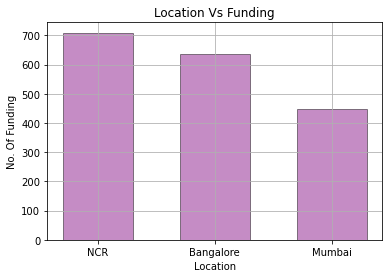

In [226]:
import pandas as pd
import csv
import numpy as np
df=pd.read_csv('startup_funding.csv',encoding='utf8')
df['CityLocation'].dropna(inplace=True)
df['CityLocation'].replace("Delhi","New Delhi",inplace=True)
df['CityLocation'].replace("bangalore","Bangalore",inplace=True)

d={}
for i in df['CityLocation']:
    if ('Bangalore' in i or 'New Delhi' in i or 'Gurgaon' in i or 'Noida' in i or 'Mumbai' in i):
        if '/' not in i.strip():
            
            
        else:
            li=i.split("/")
            for j in li:
                if ('Bangalore' in j or 'New Delhi' in j or 'Gurgaon' in j or 'Noida' in j or 'Mumbai' in j):
                    d[j.strip()]=d.get(j.strip(),0)+1

d['NCR'] =d['Noida']+d['New Delhi']+d['Gurgaon']

del d['New Delhi']
del d['Gurgaon']
del d['Noida']

print(d)

# sorting the Dictionary in descending order
sort_d=sorted(d.items(), key=lambda x: x[1],reverse = True)

cities=[]
val=[]
for i,j in sort_d:
    cities.append(i)
    val.append(j)

print(" ")
print("City with max funding is : " + cities[0])    
    
plt.bar(cities,val,alpha=0.45,color="purple",width=0.6,edgecolor="black");
plt.xlabel("Location")
plt.ylabel("No. Of Funding")
plt.title("Location Vs Funding")
plt.grid()
plt.show();

### Question 2:
<b>Even after trying for so many times, your friend’s startup could not find the investment. So you decided to take this matter in your hand and try to find the list of investors who probably can invest in your friend’s startup. Your list will increase the chance of your friend startup getting some initial investment by contacting these investors. Find the top 5 investors who have invested maximum number of times (consider repeat investments in one company also). In a startup, multiple investors might have invested. So consider each investor for that startup. Ignore undisclosed investors.</b>

Top 5 investors are: 
Sequoia Capital
Accel Partners
Kalaari Capital
SAIF Partners
Indian Angel Network


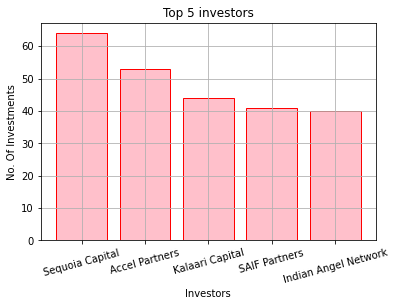

In [146]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

df=pd.read_csv('startup_funding.csv',encoding='utf8')
df=df[(df.InvestorsName != "Undisclosed")]
df= df[(df.InvestorsName != "undisclosed")]

df.InvestorsName.dropna(inplace=True)
d={}
for i in df['InvestorsName']:
    
    if ',' not in i.strip():
        d[i]=d.get(i,0)+1
    else:
        li=i.split(",")
        for j in li:
            d[j.strip()]=d.get(j.strip(),0)+1
            
sort_d=sorted(d.items(),key=lambda x: x[1],reverse=True)

investors=[]
val=[]


for i,j in sort_d[:5]:
        investors.append(i)
        val.append(j)

print("Top 5 investors are: ")
for i in investors:
    print(i)
    
plt.bar(investors,v   al, align='center',width=0.8,edgecolor ="red",color="pink")
plt.xticks(rotation=15)
plt.xlabel("Investors")
plt.ylabel("No. Of Investments")
plt.title("Top 5 investors")
plt.grid()
plt.show()

### Question 3:
<b>After re-analysing the dataset you found out that some investors have invested in the same startup at different number of funding rounds. So before finalising the previous list, you want to improvise it by finding the top 5 investors who have invested in different number of startups. This list will be more helpful than your previous list in finding the investment for your friend startup. Find the top 5 investors who have invested maximum number of times in different companies. That means, if one investor has invested multiple times in one startup, count one for that company. There are many errors in startup names. Ignore correcting all, just handle the important ones - Ola, Flipkart, Oyo and Paytm.</b>

Sequoia Capital 48
Accel Partners 47
Kalaari Capital 41
Indian Angel Network 40
Blume Ventures 36


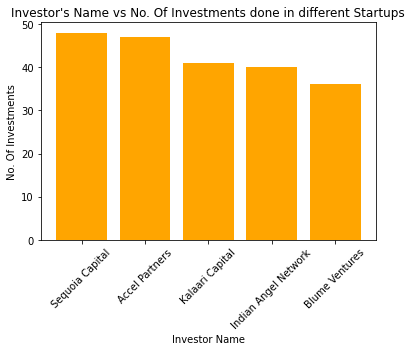

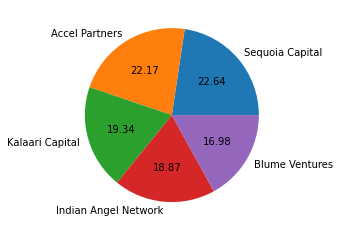

In [230]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

file = pd.read_csv("startup_funding.csv")
df = file.copy()

# dropping all the missing elements.
df.dropna(subset = ['InvestorsName'],inplace = True)

# Handling the errors in the names of some important start-ups
df['StartupName'].replace('Flipkart.com','Flipkart', inplace = True)
df['StartupName'].replace('Ola Cabs','Ola', inplace = True)
df['StartupName'].replace('Olacabs','Ola', inplace = True)
df['StartupName'].replace('Oyo Rooms','Oyo', inplace = True)
df['StartupName'].replace('Paytm Marketplace','Paytm', inplace = True)
df['StartupName'].replace('Oyorooms','Oyo', inplace = True)
df['StartupName'].replace('OyoRooms','Oyo', inplace = True)
df['StartupName'].replace('OYO Rooms','Oyo', inplace = True)

df.reset_index(drop = True , inplace = True)

d = {} #dictionary for counting no. of investment round as per the startup name and the investor name 
for i in range(len(df)):
    if df.InvestorsName[i] != "":
        a = df.InvestorsName[i].split(",")
        for j in a:
            j = j.strip()
            if (df.StartupName[i],j) in d:
                d[(df.StartupName[i],j)] = d[(df.StartupName[i],j)] + 1
            else:
                d[(df.StartupName[i],j)] = 1
            
x = [] #list of investors 
for i in d:
    x.append(i[1])
dic = {} # for finding investors without repetitive invesment done by the investor 
for i in x:
    if i in dic:
        dic[i] = dic[i] + 1
    else:
        dic[i] = 1
dic[""] = 0
x1 = []
x2 = []
sorted_d = sorted(dic.items(), key=lambda kv: kv[1],reverse = True) # sorted list in descending order 
for i in sorted_d[:5]:
    print(i[0],i[1])
    x1.append(i[0])
    x2.append(i[1])
#graph plot     
plt.bar(x1,x2,color = "orange")

plt.xlabel("Investor Name")
plt.ylabel("No. Of Investments")
plt.title("Investor's Name vs No. Of Investments done in different Startups")
plt.xticks(rotation = 45)
plt.show()
plt.pie(x2,labels = x1,autopct = "%.2f")
plt.show()

### Question 4:
<b> Even after putting so much effort in finding the probable investors, it didn't turn out to be helpful for your friend. So you went to your investor friend to understand the situation better and your investor friend explained to you about the different Investment Types and their features. This new information will be helpful in finding the right investor. Since your friend startup is at an early stage startup, the best-suited investment type would be - Seed Funding and Crowdfunding. Find the top 5 investors who have invested in a different number of startups and their investment type is Crowdfunding or Seed Funding. Correct spelling of investment types are - "Private Equity", "Seed Funding", "Debt Funding", and "Crowd Funding". Keep an eye for any spelling mistake. You can find this by printing unique values from this column. There are many errors in startup names. Ignore correcting all, just handle the important ones - Ola, Flipkart, Oyo and Paytm.</b>

Indian Angel Network 33
Rajan Anandan 23
LetsVenture 16
Anupam Mittal 16
Kunal Shah 14


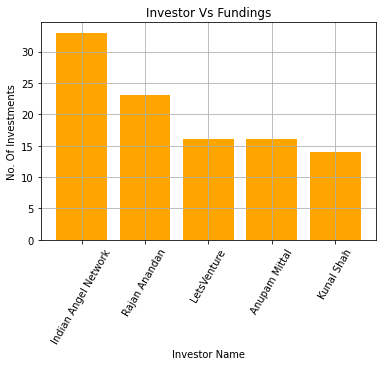

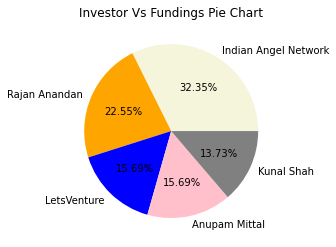

In [237]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

file = pd.read_csv("startup_funding.csv")
df = file.copy()

# dropping all the missing elements.
df.dropna(subset = ['InvestorsName'],inplace = True)
df['InvestmentType'].dropna(inplace = True)

# Handling the errors in the names of some important start-ups
df['StartupName'].replace('Flipkart.com','Flipkart', inplace = True)
df['StartupName'].replace('Ola Cabs','Ola', inplace = True)
df['StartupName'].replace('Olacabs','Ola', inplace = True)
df['StartupName'].replace('Oyo Rooms','Oyo', inplace = True)
df['StartupName'].replace('Paytm Marketplace','Paytm', inplace = True)
df['StartupName'].replace('Oyorooms','Oyo', inplace = True)
df['StartupName'].replace('OyoRooms','Oyo', inplace = True)
df['StartupName'].replace('OYO Rooms','Oyo', inplace = True)


df['InvestmentType'].replace('PrivateEquity', 'Private Equity', inplace = True)
df['InvestmentType'].replace ('SeedFunding', 'Seed Funding', inplace = True)
df['InvestmentType'].replace('Crowd funding', 'Crowd Funding', inplace = True)

df.reset_index(drop = True , inplace = True)

df = df[(df['InvestmentType'] == 'Seed Funding') | (df['InvestmentType'] == 'Crowd Funding')]

df.reset_index(drop = True , inplace = True)
# Making dictionary of all the investors and startup combination
def createDict(df):
    d1 = {}
    for i in range(len(df)):
        a = df['InvestorsName'][i].split(',')
        for j in a:
            j = j.strip()
            d1[(df['StartupName'][i],j)] = d1.get((df['StartupName'][i],j),0) + 1
            
    return d1

# calling dictionary
dictionary = createDict(df)

# function to create dictionary of non - repetitive investors
def unique_investors(dic):
    x = [] # list of investors
    for i in dictionary:
        x.append(i[1])
    
    d2 = {} #for finding investors without repetitive invesment done by the investor 
    for i in x:
        d2[i] = d2.get(i,0) + 1
    return d2

final_dic = unique_investors(dictionary)
final_dic[''] = 0
final_dic['Undisclosed Investors'] = 0
final_dic['Undisclosed investors'] = 0

# sorting the Dictionary in descending order according to the number of investments
sorted_d = sorted(final_dic.items(), key=lambda kv: kv[1],reverse = True)

investor_count = []
investor_name = []

# adding top 5 investors to the lists.
for i in range(5):
    print(sorted_d[i][0],sorted_d[i][1])
    investor_count.append(sorted_d[i][1])
    investor_name.append(sorted_d[i][0])

y = investor_count
x = investor_name

# plotting the bar graph for top 5 investors
plt.bar(x,y, color = 'orange')
plt.xlabel("Investor Name")
plt.ylabel("No. Of Investments")
plt.title("Investor Vs Fundings")
plt.grid()
plt.xticks(rotation = 60)
plt.show()

# plotting the pie chart b/w top 5 investors and number of fundings.
color = ["beige", "orange", "blue", "pink", "grey"]
plt.pie(y, labels = x, colors = color, autopct = "%.2f%%")
plt.title("Investor Vs Fundings Pie Chart")
plt.show()

### QUESTION 5

<b>Due to your immense help, your friend startup successfully got seed funding and it is on the operational mode. Now your friend wants to expand his startup and he is looking for new investors for his startup. Now you again come as a saviour to help your friend and want to create a list of probable new new investors. Before moving forward you remember your investor friend advice that finding the investors by analysing the investment type. Since your friend startup is not in early phase it is in growth stage so the best-suited investment type is Private Equity. Find the top 5 investors who have invested in a different number of startups and their investment type is Private Equity. Correct spelling of investment types are - "Private Equity", "Seed Funding", "Debt Funding", and "Crowd Funding". Keep an eye for any spelling mistake. You can find this by printing unique values from this column.There are many errors in startup names. Ignore correcting all, just handle the important ones - Ola, Flipkart, Oyo and Paytm.</b>

Sequoia Capital 45
Accel Partners 43
Kalaari Capital 35
Blume Ventures 26
SAIF Partners 24


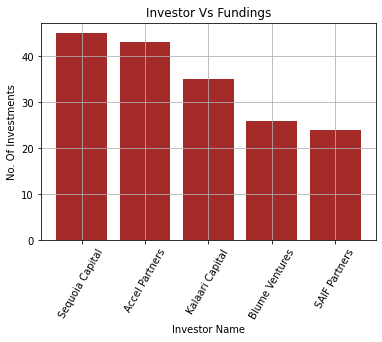

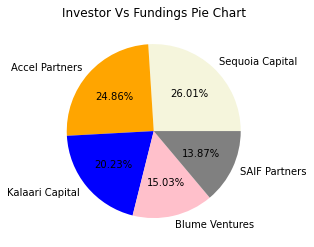

In [236]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

file = pd.read_csv("startup_funding.csv")
df = file.copy()

# dropping all the missing elements.
df.dropna(subset = ['InvestorsName'],inplace = True)
df['InvestmentType'].dropna(inplace = True)

# Handling the errors in the names of some important start-ups
df['StartupName'].replace('Flipkart.com','Flipkart', inplace = True)
df['StartupName'].replace('Ola Cabs','Ola', inplace = True)
df['StartupName'].replace('Olacabs','Ola', inplace = True)
df['StartupName'].replace('Oyo Rooms','Oyo', inplace = True)
df['StartupName'].replace('Paytm Marketplace','Paytm', inplace = True)
df['StartupName'].replace('Oyorooms','Oyo', inplace = True)
df['StartupName'].replace('OyoRooms','Oyo', inplace = True)
df['StartupName'].replace('OYO Rooms','Oyo', inplace = True)


df['InvestmentType'].replace('PrivateEquity', 'Private Equity', inplace = True)

df.reset_index(drop = True , inplace = True)

df = df[df['InvestmentType'] == 'Private Equity']

df.reset_index(drop = True , inplace = True)
# Making dictionary of all the investors and startup combination
def createDict(df):
    d1 = {}
    for i in range(len(df)):
        a = df['InvestorsName'][i].split(',')
        for j in a:
            j = j.strip()
            d1[(df['StartupName'][i],j)] = d1.get((df['StartupName'][i],j),0) + 1
            
    return d1

# calling dictionary
dictionary = createDict(df)

# function to create dictionary of non - repetitive investors
def unique_investors(dic):
    x = [] # list of investors
    for i in dictionary:
        x.append(i[1])
    
    d2 = {} #for finding investors without repetitive invesment done by the investor 
    for i in x:
        d2[i] = d2.get(i,0) + 1
    return d2

final_dic = unique_investors(dictionary)
final_dic[''] = 0
final_dic['Undisclosed Investors'] = 0
final_dic['Undisclosed investors'] = 0

# sorting the Dictionary in descending order according to the number of investments
sorted_d = sorted(final_dic.items(), key=lambda kv: kv[1],reverse = True)

investor_count = []
investor_name = []

# adding top 5 investors to the lists.
for i in range(5):
    print(sorted_d[i][0],sorted_d[i][1])
    investor_count.append(sorted_d[i][1])
    investor_name.append(sorted_d[i][0])

y = investor_count
x = investor_name

# plotting the bar graph for top 5 investors
plt.bar(x,y, color = 'brown')
plt.xlabel("Investor Name")
plt.ylabel("No. Of Investments")
plt.title("Investor Vs Fundings")
plt.grid()
plt.xticks(rotation = 60)
plt.show()

# plotting the pie chart b/w top 5 investors and number of fundings.
color = ["beige", "orange", "blue", "pink", "grey"]
plt.pie(y, labels = x, colors = color, autopct = "%.2f%%")
plt.title("Investor Vs Fundings Pie Chart")
plt.show()